# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


##*Import necessary libraries for model*

In [1]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import os

# Import Datavisualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.misc import toimage

# Set Theme for Data Visualization
%matplotlib inline
sns.set_style('whitegrid')

# Mitigating Warnings
import warnings
warnings.filterwarnings('ignore')

# For time based calculations
import time

# Import TensorFlow and Keras
import tensorflow as tf
import keras

# Import Open CV - For Image Processing
import cv2

# Import Modules from Keras for CNN Modeling
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense, Activation, Flatten, Reshape
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.optimizers import adam

# Import Libraries for Train-Test split, Scaling and Metric calculation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Using TensorFlow backend.


In [0]:
#Reset Default graph - Needed only for Jupyter notebook
tf.reset_default_graph()
tf.set_random_seed(10)

### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [3]:
(trainX, trainY), (testX, testY) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 32s 0us/step


In [4]:
# Shape of Train and Test Data

print("Train X:",trainX.shape)

print("Train Y:",trainY.shape)

print("Test X:",testX.shape)

print("Test Y:",testY.shape)

Train X: (50000, 32, 32, 3)
Train Y: (50000, 1)
Test X: (10000, 32, 32, 3)
Test Y: (10000, 1)


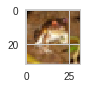

In [5]:
# Image Visualization - Training Image
w=1
h=1
fig=plt.figure(figsize=(w, h))
plt.imshow(trainX[0])

In [6]:
# Label Visualization - Training Label
trainY[0]

array([6], dtype=uint8)

In [0]:
# Flatten trainY and testY fron 2D to 1D
trainY = trainY.flatten()
testY = testY.flatten()

In [8]:
# Shape of Train and Test Data

print("Train X:",trainX.shape)

print("Train Y:",trainY.shape)

print("Test X:",testX.shape)

print("Test Y:",testY.shape)

Train X: (50000, 32, 32, 3)
Train Y: (50000,)
Test X: (10000, 32, 32, 3)
Test Y: (10000,)


In [0]:
# Mask 1 for digits between 0 - 4
train_mask_1 = np.isin(trainY, [0,1,2,3,4])
test_mask_1 = np.isin(testY, [0,1,2,3,4])

# Mask 2 for digits between 5 - 9
train_mask_2 = np.isin(trainY, [5,6,7,8,9])
test_mask_2 = np.isin(testY, [5,6,7,8,9])

In [10]:
print("train_mask_1:",train_mask_1)
print("test_mask_1:",test_mask_1)
print("train_mask_2:",train_mask_2)
print("test_mask_2:",test_mask_2)

train_mask_1: [False False False ... False  True  True]
test_mask_1: [ True False False ... False  True False]
train_mask_2: [ True  True  True ...  True False False]
test_mask_2: [False  True  True ...  True False  True]


In [0]:
# Use of mask to divide the dataset 0 - 4

X_train1, Y_train1 = trainX[train_mask_1], trainY[train_mask_1]
X_test1, Y_test1 = testX[test_mask_1], testY[test_mask_1]

In [12]:
# Shape of Train and Test Data (0 - 4)

print("Train X (0-4):",X_train1.shape)

print("Train Y (0-4):",Y_train1.shape)

print("Test X (0-4):",X_test1.shape)

print("Test Y (0-4):",Y_test1.shape)

Train X (0-4): (25000, 32, 32, 3)
Train Y (0-4): (25000,)
Test X (0-4): (5000, 32, 32, 3)
Test Y (0-4): (5000,)


### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [13]:
# convert class vectors to binary class matrices
Y_train1 = keras.utils.to_categorical(Y_train1, 5)
Y_test1 = keras.utils.to_categorical(Y_test1, 5)

print("Shape of Training Labels (0-4):",Y_train1.shape)
print("Shape of Test Labels (0-4):",Y_test1.shape)

Shape of Training Labels (0-4): (25000, 5)
Shape of Test Labels (0-4): (5000, 5)


### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [14]:
# Reshape x_train and x_test to a 4 Dimensional array (channel = 3) to pass it into a Conv2D layer

X_train1 = X_train1.astype('float32')
X_test1 = X_test1.astype('float32')

X_train1 = X_train1.reshape(X_train1.shape[0],32,32,3)
X_test1 = X_test1.reshape(X_test1.shape[0],32,32,3)

print("Shape of Training Set (0-4):",X_train1.shape)
print("Shape of Test Set (0-4):",X_test1.shape)

Shape of Training Set (0-4): (25000, 32, 32, 3)
Shape of Test Set (0-4): (5000, 32, 32, 3)


In [15]:
# Define Model
    model = Sequential()
  
# Add Batch Normalization
    model.add(BatchNormalization(input_shape = (32,32,3)))

# Convolution Neural Network - Set 1

    # 1st Conv Layer
    model.add(Convolution2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32,32,3),name='conv_1'))
    
    # Max Pooling - 1
    model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))
    
    # Dropout - 1
    model.add(Dropout(0.3,name='drop_1'))
    
# Convolution Neural Network - Set 2

    # 2nd Conv Layer
    model.add(Convolution2D(128, (4, 4), padding = 'same', activation='relu',name='conv_2'))

    # Max Pooling - 2
    model.add(MaxPooling2D(pool_size=(2, 2),name='max_2'))
    
    # Dropout - 2
    model.add(Dropout(0.25,name='drop_2'))
    
# Convolution Neural Network - Set 3

    # 3rd Conv Layer
    model.add(Convolution2D(128, (3, 3), padding = 'same', activation='relu',name='conv_3'))

    # Max Pooling - 3
    model.add(MaxPooling2D(pool_size=(2, 2),name='max_3'))
    
    # Dropout - 3
    model.add(Dropout(0.2,name='drop_3'))
    
# Convolution Neural Network - Set 4

    # 3rd Conv Layer
    model.add(Convolution2D(256, (2, 2), padding = 'same', activation='relu',name='conv_4'))

    # Max Pooling - 3
    model.add(MaxPooling2D(pool_size=(2, 2),name='max_4'))
    
    # Dropout - 3
    model.add(Dropout(0.15,name='drop_4'))
    
# Fully Connected Layers
    
    # Fully Connected Layer - Dense Layer
    model.add(Flatten())
    
    model.add(Dense(256, activation='relu',name='dense_1'))
    model.add(Dropout(0.1,name='drop_5'))
    
    model.add(Dense(128, activation='relu',name='dense_2'))
    model.add(Dropout(0.05,name='drop_6'))
    
    model.add(Dense(64, activation='relu',name='dense_3'))
    model.add(Dropout(0.02,name='drop_7'))
    
# Output Layer and Optimizer
    
    # Prediction Layer
    model.add(Dense(5, activation='softmax',name='output_1'))
    
    # Loss and Optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
TRAIN = False
BATCH_SIZE = 25
EPOCHS = 15

In [17]:
# Train the model
    model.fit(X_train1, Y_train1, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(X_test1, Y_test1), callbacks=callback_list)

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 5000 samples
Epoch 1/15
25000/25000 [==============================] - 28s 1ms/step - loss: 1.1248 - acc: 0.5255 - val_loss: 0.8572 - val_acc: 0.6540
Epoch 2/15
25000/25000 [==============================] - 24s 974us/step - loss: 0.8459 - acc: 0.6670 - val_loss: 0.7567 - val_acc: 0.7164
Epoch 3/15
25000/25000 [==============================] - 24s 976us/step - loss: 0.7456 - acc: 0.7154 - val_loss: 0.6750 - val_acc: 0.7424
Epoch 4/15
25000/25000 [==============================] - 24s 980us/step - loss: 0.6721 - acc: 0.7495 - val_loss: 0.5911 - val_acc: 0.7790
Epoch 5/15
25000/25000 [==============================] - 24s 976us/step - loss: 0.6218 - acc: 0.7694 - val_loss: 0.5638 - val_acc: 0.7916
Epoch 6/15
25000/25000 [==============================] - 24s 974us/step - loss: 0.5745 - acc: 0.7867 - val_loss: 0.5154 - val_acc: 0.8048
Epoch 7/15
25000/25000 [==============================] - 24s 978us/ste

In [18]:
# Model Accuracy
score_train = model.evaluate(X_train1, Y_train1)
score_test = model.evaluate(X_test1, Y_test1)
print()
print('Training accuracy: ', score_train[1])
print('Test accuracy: ', score_test[1])

5000/5000 [==============================] - 1s 239us/step

Training accuracy:  0.91516
Test accuracy:  0.8472


### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [19]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

batch_normalization_1
False
conv_1
False
max_1
False
drop_1
False
conv_2
False
max_2
False
drop_2
False
conv_3
False
max_3
False
drop_3
False
conv_4
False
max_4
False
drop_4
False
flatten_1
False
dense_1
True
drop_5
False
dense_2
True
drop_6
False
dense_3
True
drop_7
False
output_1
False


### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [0]:
# Use of mask to divide the dataset 5 - 9

X_train2, Y_train2 = trainX[train_mask_2], trainY[train_mask_2]
X_test2, Y_test2 = testX[test_mask_2], testY[test_mask_2]

In [21]:
# Shape of Train and Test Data (5 - 9)

print("Train X (5-9):",X_train2.shape)

print("Train Y (5-9):",Y_train2.shape)

print("Test X (5-9):",X_test2.shape)

print("Test Y (5-9):",Y_test2.shape)

Train X (5-9): (25000, 32, 32, 3)
Train Y (5-9): (25000,)
Test X (5-9): (5000, 32, 32, 3)
Test Y (5-9): (5000,)


In [0]:
# Convert to Float
X_train2 = X_train2.astype('float32')
X_test2 = X_test2.astype('float32')

# Reshape training and testing
X_train2 = X_train2.reshape(X_train2.shape[0],32,32,3)
X_test2 = X_test2.reshape(X_test2.shape[0],32,32,3)

In [0]:
# Convert class vectors to binary class matrices
Y_train2 = keras.utils.to_categorical(Y_train2-5)
Y_test2 = keras.utils.to_categorical(Y_test2-5)

In [24]:
# Train the model
    model.fit(X_train2, Y_train2, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(X_test2, Y_test2), callbacks=callback_list)

Train on 25000 samples, validate on 5000 samples
Epoch 1/15
25000/25000 [==============================] - 24s 942us/step - loss: 0.7499 - acc: 0.7250 - val_loss: 0.4854 - val_acc: 0.8418
Epoch 2/15
25000/25000 [==============================] - 23s 940us/step - loss: 0.4881 - acc: 0.8298 - val_loss: 0.3526 - val_acc: 0.8740
Epoch 3/15
25000/25000 [==============================] - 23s 926us/step - loss: 0.4185 - acc: 0.8526 - val_loss: 0.3512 - val_acc: 0.8808
Epoch 4/15
25000/25000 [==============================] - 23s 924us/step - loss: 0.3838 - acc: 0.8660 - val_loss: 0.3354 - val_acc: 0.8826
Epoch 5/15
25000/25000 [==============================] - 23s 916us/step - loss: 0.3492 - acc: 0.8771 - val_loss: 0.3073 - val_acc: 0.9004
Epoch 6/15
25000/25000 [==============================] - 23s 921us/step - loss: 0.3238 - acc: 0.8894 - val_loss: 0.3047 - val_acc: 0.8950
Epoch 7/15
25000/25000 [==============================] - 23s 931us/step - loss: 0.3043 - acc: 0.8955 - val_loss: 0.2

In [25]:
# Model Accuracy
score_train = model.evaluate(X_train2, Y_train2)
score_test = model.evaluate(X_test2, Y_test2)
print()
print('Training accuracy: ', score_train[1])
print('Test accuracy: ', score_test[1])

5000/5000 [==============================] - 1s 233us/step

Training accuracy:  0.96972
Test accuracy:  0.9164


# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
import requests
import pickle

import sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
def clean_line(t):
    return (t.replace('\n',' ')
            .replace('\r',' ')
            .replace('\t',' ')
            .replace('  ',' ')
            .strip())

In [29]:
def load_and_process_data():
    min_len = 40
    
    all_data = fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'))
    
    all_text = [clean_line(t) for t in all_data.data]
    all_data_df = pd.DataFrame({'text' : all_text, 'topics' : all_data.target})
    
    cleaned_df = all_data_df[all_data_df.text.str.len() > min_len]

    X_raw = cleaned_df['text'].values
    y_raw = cleaned_df['topics'].values
    
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw,y_raw,random_state = 42, test_size=0.20)

    tfidf = TfidfVectorizer()
    X_train_tfidf = tfidf.fit_transform(X_train_raw)
    X_test_tfidf = tfidf.transform(X_test_raw)

    return X_train_tfidf, X_test_tfidf, y_train, y_test
    
    
X_train, X_test, y_train, y_test = load_and_process_data()

In [0]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [0]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### 8. Test data

In [0]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [33]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [34]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [35]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [37]:
# Term Frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(twenty_train).toarray(), columns=vect.get_feature_names())
tf

,data,descr,filenames,target,target_names
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,1,0,0,0


In [38]:
# Document Frequency
vect = CountVectorizer(binary=True)
X_train_dtm = vect.fit_transform(twenty_train).toarray().sum(axis=0)
pd.DataFrame(X_train_dtm.reshape(1, 5), columns=vect.get_feature_names())

,data,descr,filenames,target,target_names
0,1,1,1,1,1


In [39]:
# Document Frequency
vect = CountVectorizer(binary=True)
X_test_dtm = vect.fit_transform(twenty_test).toarray().sum(axis=0)
pd.DataFrame(X_test_dtm.reshape(1, 5), columns=vect.get_feature_names())

,data,descr,filenames,target,target_names
0,1,1,1,1,1


In [40]:
# Term Frequency-Inverse Document Frequency (simple version)
tf/X_test_dtm

,data,descr,filenames,target,target_names
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,1,0,0,0


In [41]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(twenty_train).toarray(), columns=vect.get_feature_names())

,data,descr,filenames,target,target_names
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [42]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(twenty_test).toarray(), columns=vect.get_feature_names())

,data,descr,filenames,target,target_names
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0


### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [43]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
predicted = lr_clf.predict(X_test)
np.mean(predicted == y_test)

0.754858411993337

In [44]:
lr_clf = LogisticRegression()
lr_clf.fit(X_test, y_test)
predicted = lr_clf.predict(X_test)
np.mean(predicted == y_test)

0.941976679622432

In [45]:
# Use score method to get accuracy of model
score_train = lr_clf.score(X_train, y_train)
score_test = lr_clf.score(X_test, y_test)
print()
print('Training accuracy: ', score_train)
print('Test accuracy: ', score_test)


Training accuracy:  0.6698826959117096
Test accuracy:  0.941976679622432
